## Import Modules

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nardinzk","key":"336f218601cd528ab518b8fbadf7dec9"}'}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade kaggle

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 99% 328M/331M [00:17<00:00, 23.3MB/s]
100% 331M/331M [00:17<00:00, 20.0MB/s]


In [ ]:
!unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
!pip install

In [ ]:
import pandas as pd # Data Cleaning and Exploration
import numpy as np # neural networks only handle the numpy array
import os # interact with the file system
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
import warnings
from tqdm.notebook import tqdm # Showing the Progress bar
warnings.filterwarnings('ignore') # hide warnings
%matplotlib inline
#Magic command used to reduce the need to use the
#plt.show() command

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D, Input

## Load the Dataset

In [ ]:
BASE_DIR = '/content/UTKFace'

In [ ]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

image  age  gender
0  /content/UTKFace/50_0_0_20170120133257846.jpg....   50       0
1  /content/UTKFace/24_1_3_20170104222359247.jpg....   24       1
2  /content/UTKFace/1_0_4_20161221195316815.jpg.c...    1       0
3  /content/UTKFace/26_1_3_20170104235406507.jpg....   26       1
4  /content/UTKFace/59_0_3_20170109132518583.jpg....   59       0

In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

## Exploratory Data Analysis

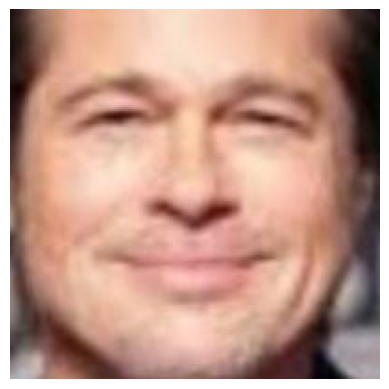

In [ ]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

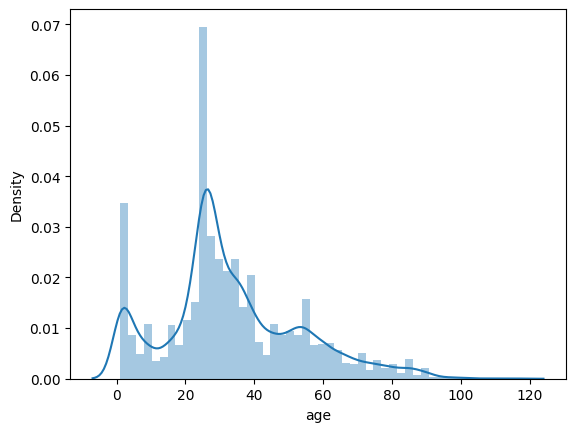

In [ ]:
sns.distplot(df['age'])

<Axes: xlabel='gender', ylabel='count'>

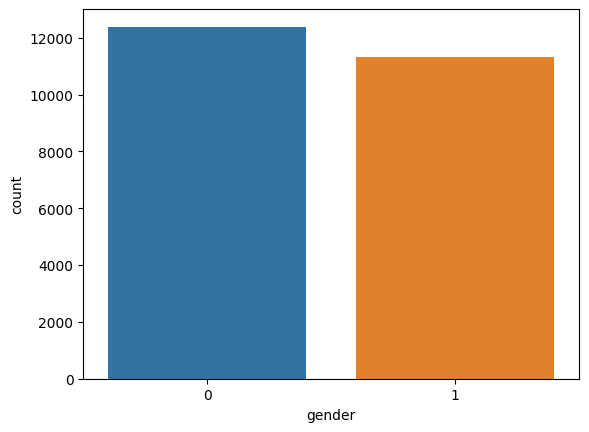

In [ ]:
sns.countplot(x ='gender', data = df) # almost follows a uniform distribution

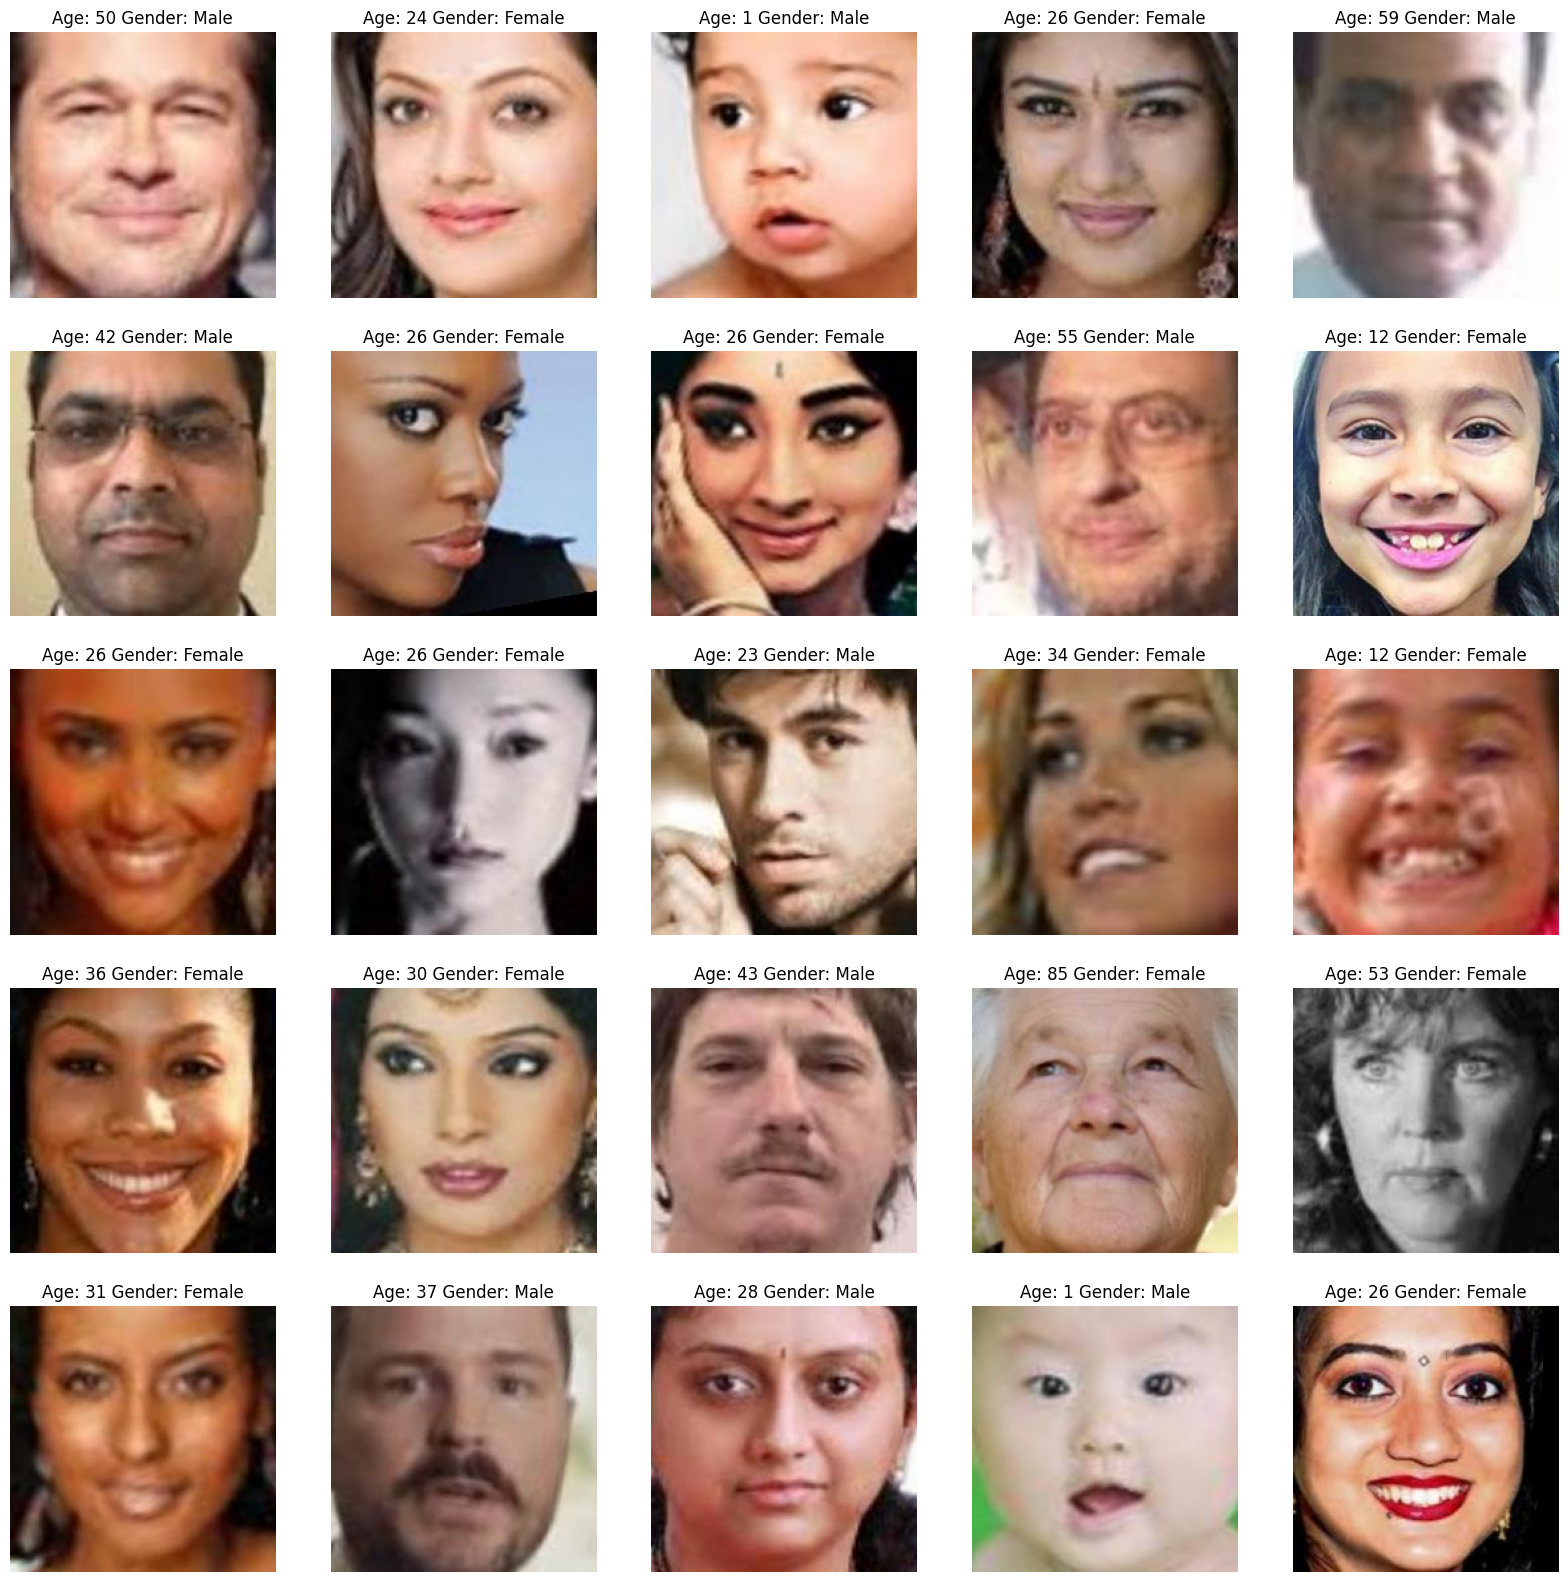

In [ ]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

## Feature Extraction

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

(23708, 128, 128, 1)

In [ ]:
# normalize the images
X = X/255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128, 128, 1)

## Model Creation

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

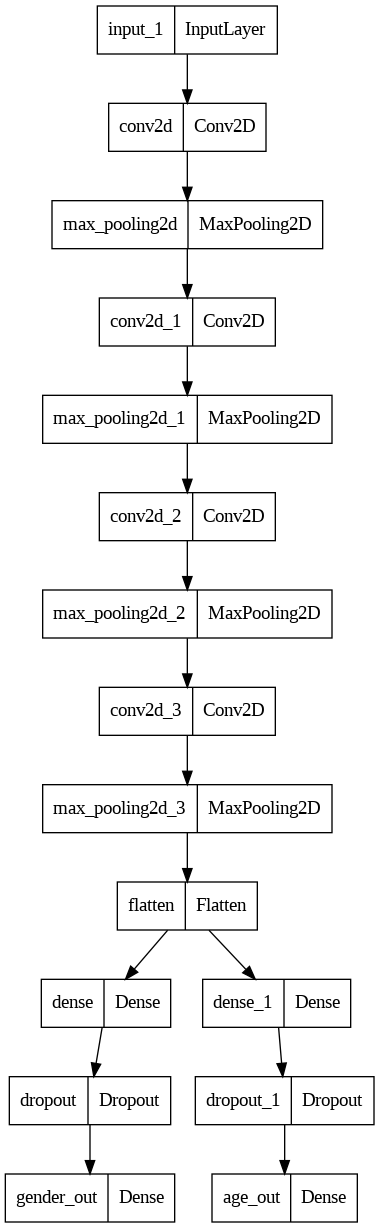

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 29s 24ms/step - loss: 15.5826 - gender_out_loss: 0.6617 - age_out_loss: 14.9209 - gender_out_accuracy: 0.5842 - age_out_accuracy: 0.0482 - val_loss: 12.8127 - val_gender_out_loss: 0.5400 - val_age_out_loss: 12.2727 - val_gender_out_accuracy: 0.7267 - val_age_out_accuracy: 0.0426
Epoch 2/30
593/593 [==============================] - 13s 22ms/step - loss: 11.4653 - gender_out_loss: 0.4848 - age_out_loss: 10.9805 - gender_out_accuracy: 0.7701 - age_out_accuracy: 0.0424 - val_loss: 9.8203 - val_gender_out_loss: 0.4163 - val_age_out_loss: 9.4040 - val_gender_out_accuracy: 0.8075 - val_age_out_accuracy: 0.0390
Epoch 3/30
593/593 [==============================] - 12s 20ms/step - loss: 9.7854 - gender_out_loss: 0.4075 - age_out_loss: 9.3779 - gender_out_accuracy: 0.8141 - age_out_accuracy: 0.0414 - val_loss: 8.5885 - val_gender_out_loss: 0.3561 - val_age_out_loss: 8.2324 - val_gender_out_accuracy: 0.8404 - val_age_out_accuracy: 0.0363
Epoc

## Plot the Results

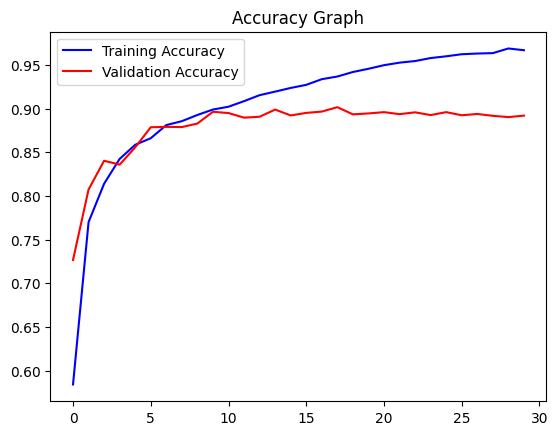

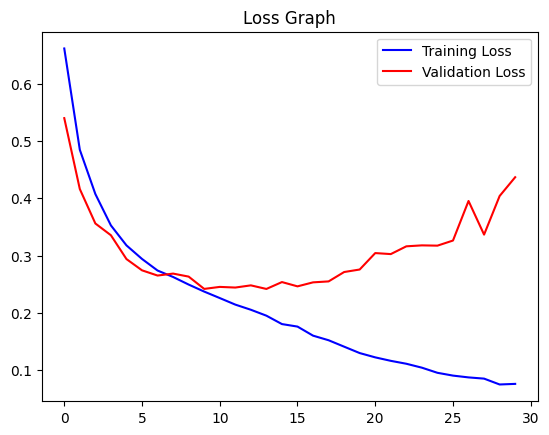

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

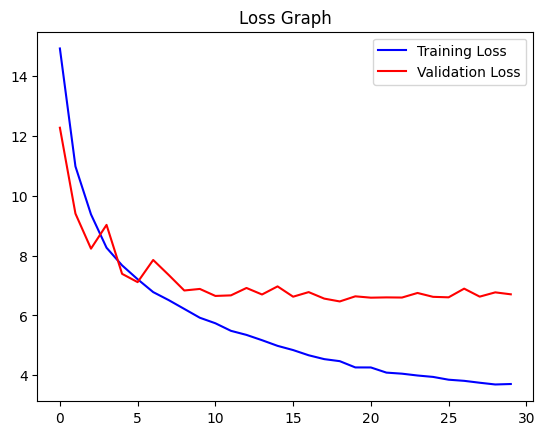

In [ ]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Prediction with Test Data

Original Gender: Female Original Age: 29
1/1 [==============================] - 0s 260ms/step
Predicted Gender: Female Predicted Age: 26


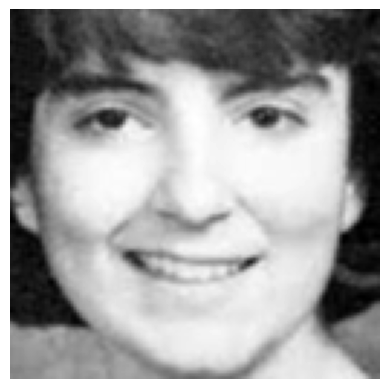

In [ ]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 14
1/1 [==============================] - 0s 18ms/step
Predicted Gender: Male Predicted Age: 14


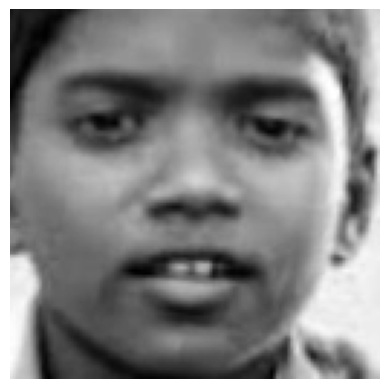

In [ ]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 26
1/1 [==============================] - 0s 50ms/step
Predicted Gender: Female Predicted Age: 28


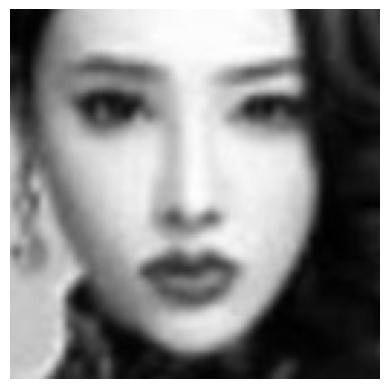

In [ ]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

                            image
0  /content/sample_data/emma2.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 217ms/step
Predicted Gender: Female


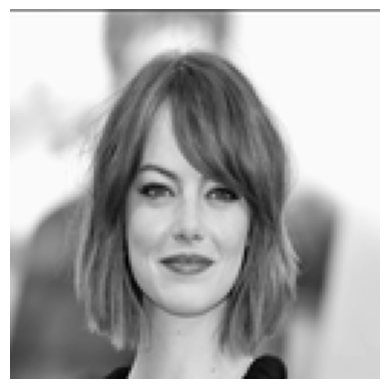

In [ ]:
data = {'image': ['/content/sample_data/emma2.jpg']}

# Create the dataframe using the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)
X = extract_features(df['image'])
pred = model.predict(X[0].reshape(1, 128, 128, 1))

pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender)
plt.axis('off')
plt.imshow(X[0].reshape(128, 128), cmap='gray');

                            image
0  /content/sample_data/women.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 100ms/step
Predicted Gender: Female


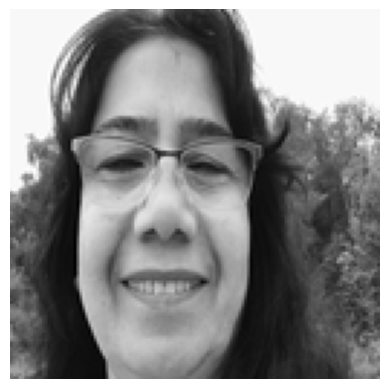

In [ ]:
data = {'image': ['/content/sample_data/women.jpg']}

# Create the dataframe using the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)
X = extract_features(df['image'])
pred = model.predict(X[0].reshape(1, 128, 128, 1))

pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender)
plt.axis('off')
plt.imshow(X[0].reshape(128, 128), cmap='gray');

                               image
0  /content/sample_data/abdoooo.jpeg


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step
Predicted Gender: Male


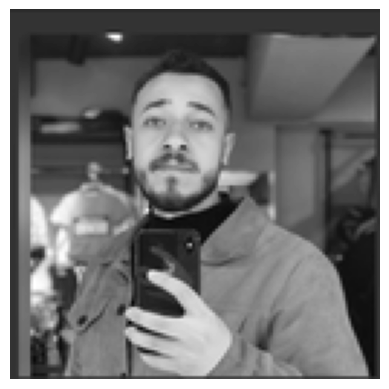

In [ ]:
data = {'image': ['/content/sample_data/abdoooo.jpeg']}

# Create the dataframe using the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)
X = extract_features(df['image'])
pred = model.predict(X[0].reshape(1, 128, 128, 1))

pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender)
plt.axis('off')
plt.imshow(X[0].reshape(128, 128), cmap='gray');

                                      image
0  /content/sample_data/abdelrhman.png.jpeg


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 41ms/step
Predicted Gender: Male


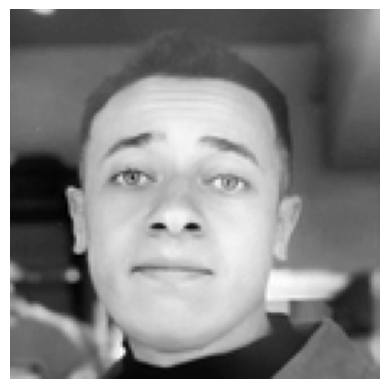

In [ ]:
data = {'image': ['/content/sample_data/abdelrhman.png.jpeg']}

# Create the dataframe using the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)
X = extract_features(df['image'])
pred = model.predict(X[0].reshape(1, 128, 128, 1))

pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender)
plt.axis('off')
plt.imshow(X[0].reshape(128, 128), cmap='gray');